# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualizing the Data

In [6]:
import matplotlib.pyplot as plt

In [13]:
sample_image = x_train[0]

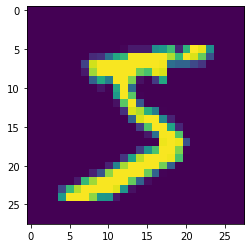

In [14]:
#sample_image
plt.imshow(sample_image)

## Data Preprocessing

### Output Labels


In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 10)
y_cat_test= to_categorical(y_test, 10)

### Input Image

In [25]:
x_train = x_train/255
x_test = x_test/255

In [27]:
sample_image = x_train[0]
sample_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

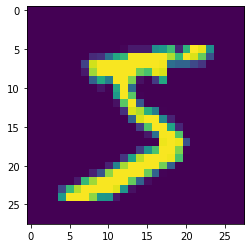

In [28]:
plt.imshow(sample_image)

In [34]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

## Creating the Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [47]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size = (4,4),input_shape = (28,28,1), activation = 'relu',))

#Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#ANN
model.add(Dense(128, activation='relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [53]:
model.fit(x_train,y_cat_train,
          epochs=10,
          validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1385 - accuracy: 0.9594 - val_loss: 0.0504 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0384 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0408 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0461 - val_accuracy: 0.9864


## Model Evaluation

In [54]:
metrics = pd.DataFrame(model.history.history)

In [55]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.138490,0.959383,0.050449,0.9835
1,0.047468,0.985433,0.038371,0.9872
2,0.029976,0.990617,0.036837,0.9880
3,0.020963,0.993117,0.040755,0.9870
4,0.013802,0.995667,0.046147,0.9864


<AxesSubplot:>

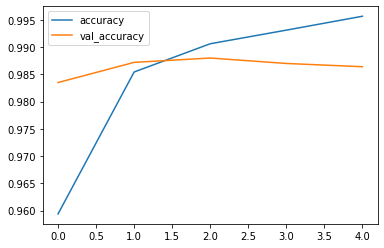

In [56]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

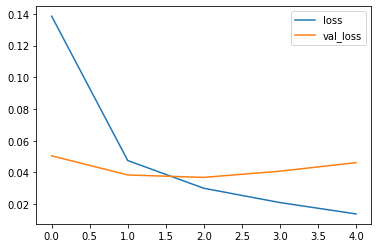

In [57]:
metrics[['loss','val_loss']].plot()

In [58]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04614720866084099, 0.9864000082015991]


In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
predictions = model.predict(x_test)

In [83]:
predictions[4]
np.argmax(predictions[4])

4

In [84]:
single_image = x_test[4]

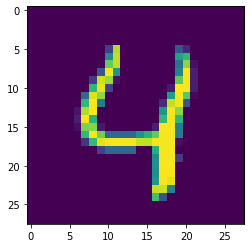

In [85]:
plt.imshow(single_image)

In [81]:
predictions = model.predict(x_test)
pred = np.argmax(predictions, axis = 1)

In [82]:
pd.DataFrame({'Test Data': pd.Series(y_test), 'Predictions': pd.Series(pred)})

,Test Data,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [87]:
confusion_matrix(y_test,pred)

array([[ 974,    0,    1,    2,    0,    0,    2,    0,    1,    0],
       [   0, 1124,    3,    1,    0,    0,    6,    1,    0,    0],
       [   0,    0, 1023,    1,    0,    0,    0,    4,    3,    1],
       [   0,    0,    3, 1003,    0,    2,    0,    0,    2,    0],
       [   0,    0,    0,    0,  972,    0,    5,    0,    0,    5],
       [   2,    0,    1,    7,    0,  878,    3,    0,    1,    0],
       [   6,    2,    0,    0,    2,    6,  940,    0,    2,    0],
       [   1,    1,    7,    3,    0,    0,    0, 1013,    1,    2],
       [   2,    1,    2,    1,    0,    2,    0,    3,  961,    2],
       [   1,    2,    0,    7,    7,    5,    0,    3,    8,  976]],
      dtype=int64)

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Predicting a given image

In [90]:
image = x_test[88]

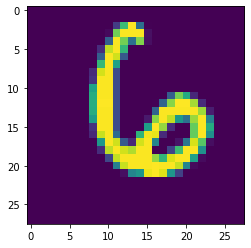

In [91]:
plt.imshow(image)

In [92]:
predicted_image = model.predict(image.reshape(1,28,28,1))

In [95]:
np.argmax(predicted_image)

6